In [1]:
import tensorflow

In [2]:
import gym
import json
import datetime as dt

from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise
from stable_baselines3 import DDPG

from env.SoccerActionsEnv import SoccerActionsEnv

import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
env = SoccerActionsEnv(randomized_start=True, end_on_xg=True)

C:\Users\Tiago Mendes-Neves\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Tiago Mendes-Neves\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
n_actions = env.action_space.shape[-1]

In [5]:
import time
t1 = time.time()

In [6]:
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=10000, log_interval=1000)
print(time.time() - t1)
#model.save("saved_models/ddpg_soccer_actions_env_1")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.16     |
|    ep_rew_mean     | 0.0194   |
| time/              |          |
|    episodes        | 1000     |
|    fps             | 50       |
|    time_elapsed    | 20       |
|    total timesteps | 1048     |
| train/             |          |
|    actor_loss      | -0.0178  |
|    critic_loss     | 0.000152 |
|    learning_rate   | 0.001    |
|    n_updates       | 947      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.6      |
|    ep_rew_mean     | 0.0213   |
| time/              |          |
|    episodes        | 2000     |
|    fps             | 44       |
|    time_elapsed    | 64       |
|    total timesteps | 2864     |
| train/             |          |
|    actor_loss      | -0.0177  |
|    critic_loss     |

# Calculating mean rewards

In [7]:
saving_rewards = []
obs = env.reset()
for i in tqdm(range(10000)):
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  #env.render()
  if done:
      saving_rewards.append(rewards)
      env.reset()
np.mean(saving_rewards)      

100%|██████████| 10000/10000 [00:12<00:00, 823.74it/s]


0.0008115741470162209

In [8]:
scouter_array = np.array([[i, j] for i in np.arange(0,1,0.01) for j in np.arange(0,1,0.0177)])
decisions = []
for array in tqdm(scouter_array):
    action, _ = model.predict(array)
    decisions.append(action)
scouter = pd.DataFrame(scouter_array * 100, columns=['x','y'])
scouter[['action','r','a']] = decisions

100%|██████████| 5700/5700 [00:03<00:00, 1832.65it/s]


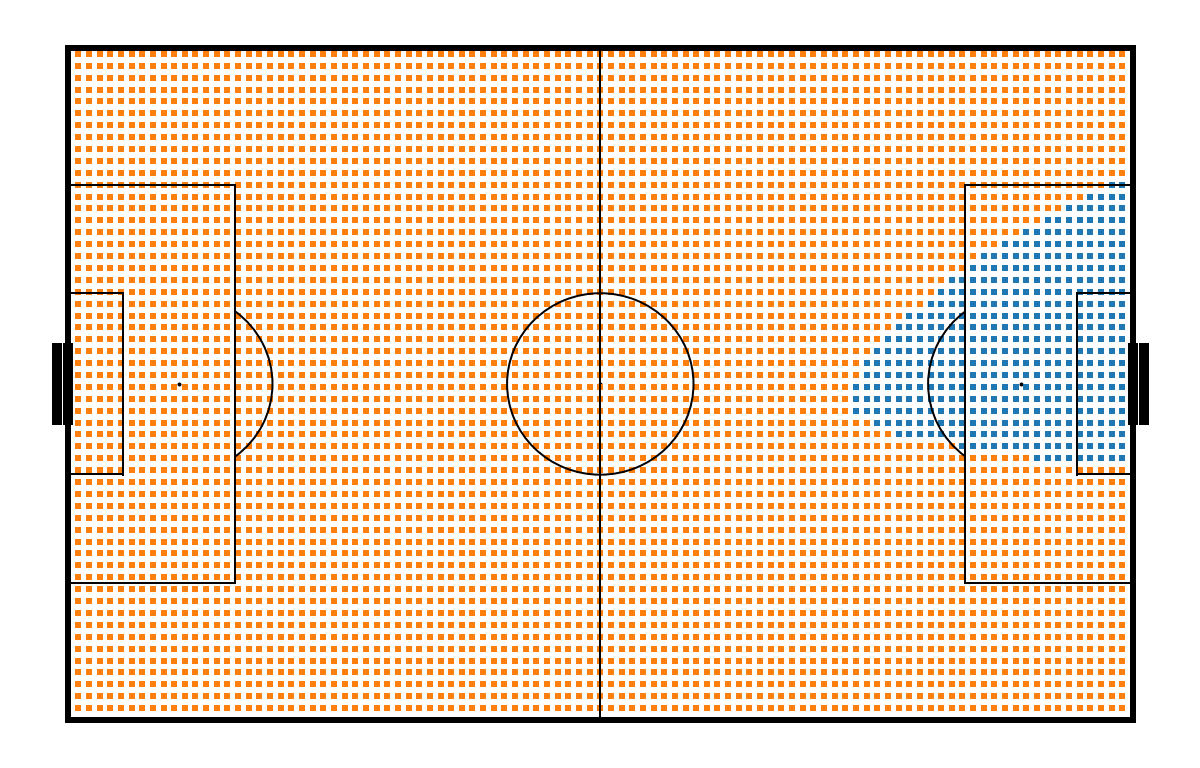

In [9]:
draw.pitch()
scouter_shots = scouter[scouter.action < 0.5]
scouter_passes = scouter[scouter.action >= 0.5]
plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
plt.scatter(scouter_passes.x, scouter_passes.y, s = 10, c = 'C1', marker = 's', linewidth=0);

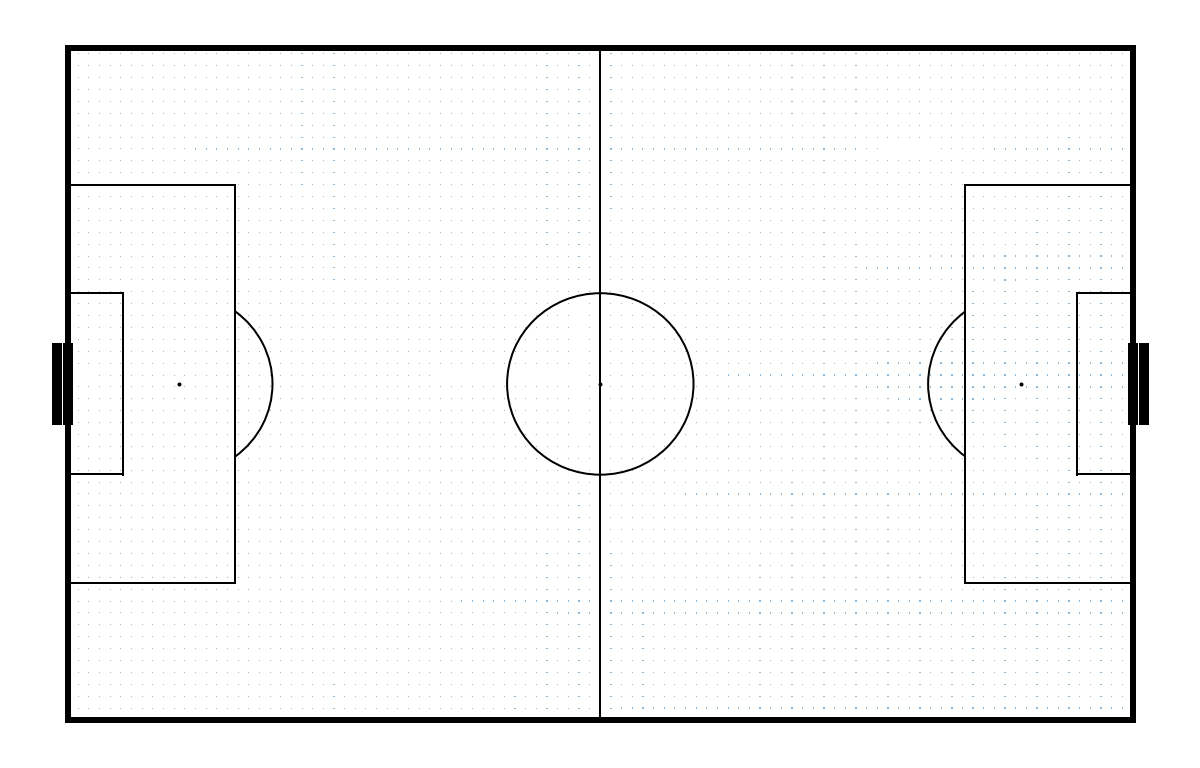

In [10]:
draw.pitch()
plt.scatter(scouter.x, scouter.y, s = scouter.r, c = 'C0', alpha = 0.5, marker = 's', linewidth=0);

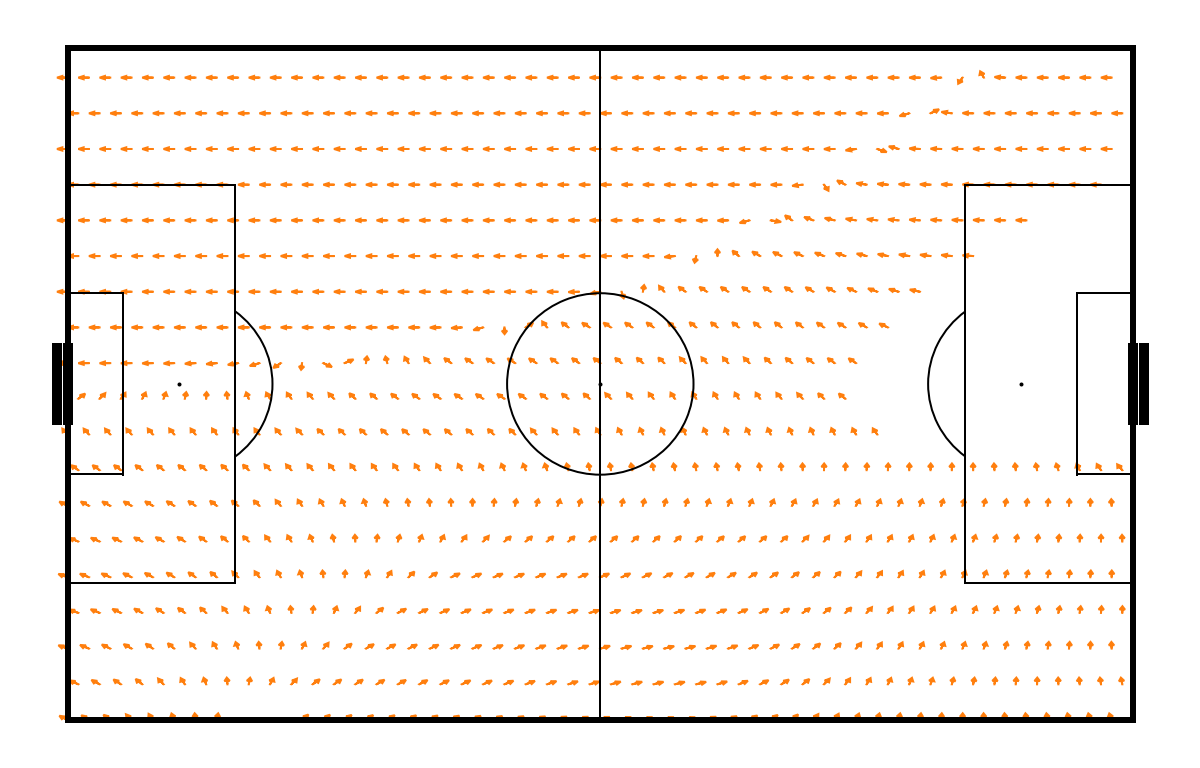

In [11]:
draw.pitch()
for i, row in scouter_passes.iterrows():
    if i%6 == 0:
        plt.arrow(row['x'], row['y'], row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .5, head_length = .5, color = 'C1')

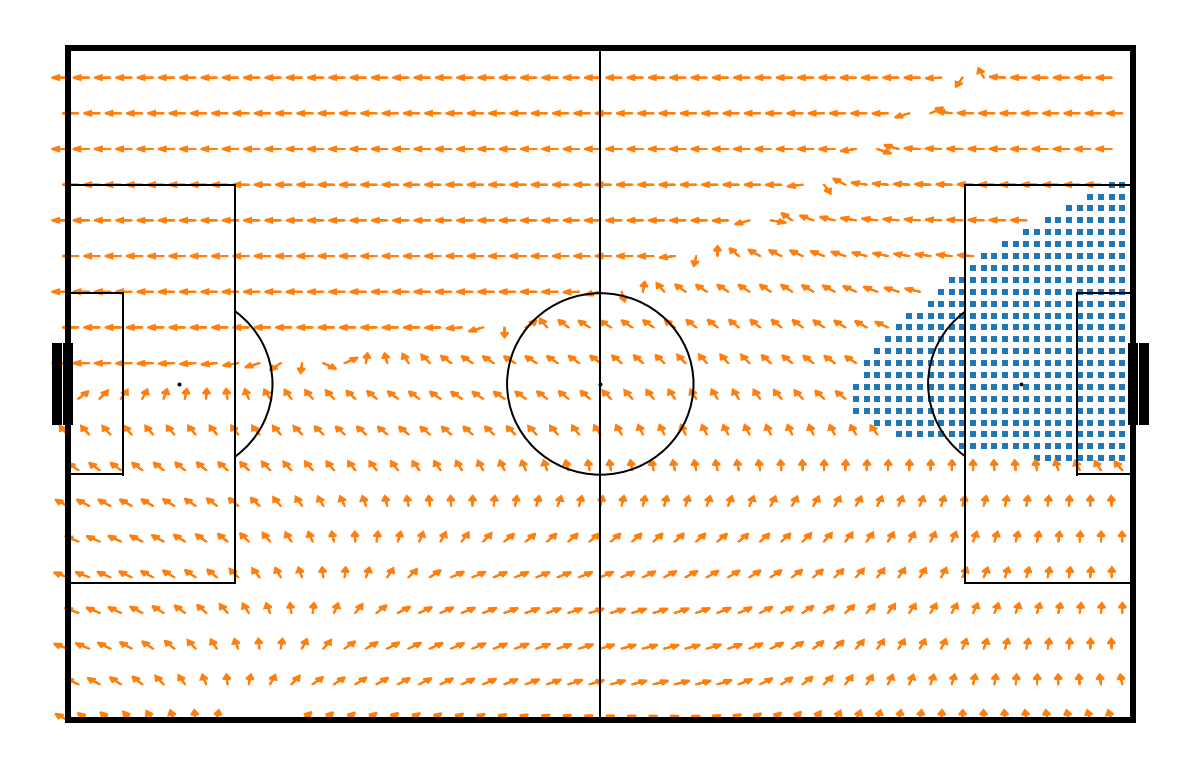

In [12]:
draw.pitch()
scouter_shots = scouter[scouter.action < 0.5]
scouter_passes = scouter[scouter.action >= 0.5]
plt.scatter(scouter_shots.x, scouter_shots.y, s = 10, c = 'C0', marker = 's', linewidth=0);
for i, row in scouter_passes.iterrows():
    if i%6 == 0:
        plt.arrow(row['x'], row['y'], 1.5*row.r/abs(row.r) * np.cos((row.a - 0.5) * 2 * np.pi), 1.5*row.r/abs(row.r) * np.sin((row.a - 0.5) * 2 * np.pi), length_includes_head = True, head_width = .7, head_length = .7, color = 'C1')